In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
import matplotlib.cm as cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

In [3]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df['Level_cat'] = np.array([0 if u == "Low" else 1 if u == "Medium" else 2 for u in df['Level']])
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_cat
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,2
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,3,2,7,8,2,4,5,3,High,2
996,996,P996,37,2,6,8,7,7,7,6,...,6,5,7,2,4,3,1,4,High,2
997,997,P997,25,2,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
998,998,P998,18,2,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2


In [5]:
df = df.drop(["Patient Id", "Level"], axis=1)

In [6]:
df

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_cat
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [7]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

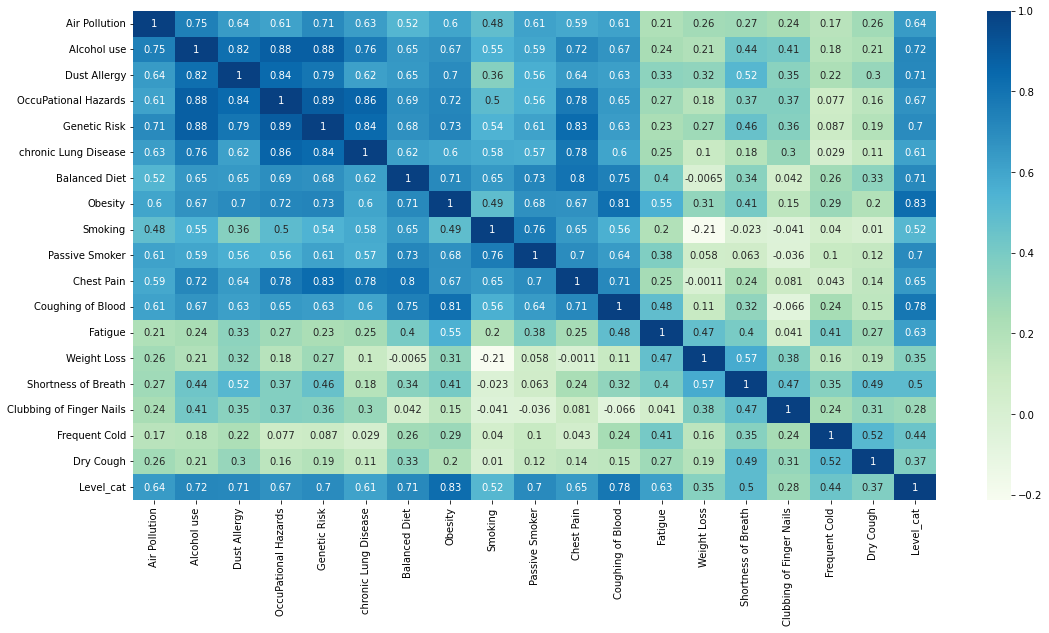

In [8]:
new_df = df.drop(["index", "Age", "Gender", "Wheezing", "Swallowing Difficulty", "Snoring"], axis=1)
plt.figure(figsize = (18,9))
sns.heatmap(new_df.corr(), cmap='GnBu', annot=True)
plt.show()

In [75]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(max_depth=3, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [76]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.04665847 0.04572409 0.02783673 0.03874952
 0.04276057 0.00284662 0.05664199 0.13070886 0.05963895 0.12730316
 0.06023693 0.15334569 0.03343148 0.01544856 0.03604762 0.05491772
 0.02185117 0.01833862 0.0102363  0.00569418 0.01158278]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.90      0.82      0.86        34
           2       0.94      0.94      0.94        36

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



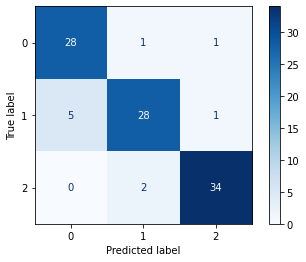

In [77]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

In [80]:
cross_val_score(RandomForestClassifier(max_depth=3, random_state=0), X, y, cv=10)

array([0.99, 0.97, 0.99, 0.99, 1.  , 1.  , 0.98, 1.  , 1.  , 1.  ])

In [94]:
X_new = X.drop(["Age", "Gender", "Dry Cough"], axis=1)
X_new

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Snoring
0,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,4
1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,2
2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,2
3,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,5
4,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,3
996,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,4
997,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,2
998,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,3


In [95]:
cross_val_score(RandomForestClassifier(max_depth=3, random_state=0), X_new, y, cv=10)

array([0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.99, 1.  , 0.99])

In [300]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=10)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10)

In [301]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.00471938 0.00084003 0.03662476 0.05791939 0.04706199 0.02814929
 0.02057381 0.0151712  0.05744606 0.09195909 0.04028077 0.08535991
 0.03589079 0.11707133 0.06522963 0.02133425 0.04115928 0.09491108
 0.03266788 0.03847831 0.01586787 0.01431914 0.03696473]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



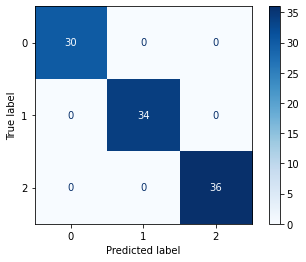

In [302]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

In [225]:
cross_val_score(RandomForestClassifier(max_depth=2, random_state=0, max_features='log2'), X, y, cv=10)

array([0.97, 0.96, 0.96, 0.97, 0.98, 0.97, 0.96, 0.98, 0.94, 0.97])

In [111]:
cross_val_score(RandomForestClassifier(max_depth=2, random_state=0, max_features='sqrt'), X, y, cv=10)

array([0.97, 0.96, 0.96, 0.97, 0.98, 0.97, 0.96, 0.98, 0.94, 0.97])

In [116]:
cross_val_score(RandomForestClassifier(max_depth=2, random_state=0, max_features='log2'), X_new, y, cv=10)

array([0.97, 0.96, 0.96, 0.97, 0.98, 0.97, 0.96, 0.98, 0.98, 0.97])

In [117]:
cross_val_score(RandomForestClassifier(max_depth=2, random_state=0, max_features='sqrt'), X, y, cv=10)

array([0.97, 0.96, 0.96, 0.97, 0.98, 0.97, 0.96, 0.98, 0.94, 0.97])

How to prevent overfitting:
* max_depth size
* max_sample split
* num_estimators
* min_sample_leafs
* min_weight_fraction_leaf

# Different criterion of random forest

## Gini

In [303]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

In [317]:
cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42), X, y, cv=10)

array([0.9 , 0.88, 0.88, 0.9 , 0.91, 0.9 , 0.89, 0.9 , 0.91, 0.89])

In [318]:
cross_val_score(RandomForestClassifier(n_estimators=100, min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42), X, y, cv=10)

array([0.9 , 0.91, 0.89, 0.9 , 0.91, 0.89, 0.88, 0.89, 0.91, 0.9 ])

In [319]:
cross_val_score(RandomForestClassifier(n_estimators=250, min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42), X, y, cv=10)

array([0.9 , 0.9 , 0.89, 0.9 , 0.9 , 0.9 , 0.89, 0.9 , 0.91, 0.89])

By looking at these, we can see that a hihger number of trees prevents overfitting more, but if we use too much trees, then the model will overfit again. Thus we will be using 250 trees to build our model.

Also we need to tune the hyperparameters of min_samples_split, to determine the minimum samples we need to have, in order to split into leaf nodes, which encourages the tree to stop splitting earlier, resulting in a simpler model with fewer nodes. It's effective for preventing overfitting, especially when dealing with small datasets or highly complex models.

The max_leaf_nodes parameter limits the maximum number of leaf nodes in the tree. Setting a lower value for max_leaf_nodes prevents the tree from becoming too deep and complex, thereby reducing the risk of overfitting. It's useful when you want to control the size of the tree explicitly.

The min_impuity_decrease parameter controls the minimum impurity decrease required for a split to occur. Increasing min_impurity_decrease prevents the tree from splitting nodes that result in minimal improvement in impurity, leading to a simpler tree. It's effective for preventing overfitting by limiting unnecessary splits.

In [320]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=250, min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(max_leaf_nodes=5, min_impurity_decrease=0.1,
                       n_estimators=250, random_state=42)

In [321]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.037117   0.05966651 0.03208684 0.0317901
 0.05224498 0.00194317 0.09867769 0.16563859 0.09491332 0.13490637
 0.02906192 0.15507954 0.01100704 0.00502669 0.01567276 0.05876706
 0.01367051 0.00115717 0.00157275 0.         0.        ]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


We can see that features that doesn't have as high of an effect on the prediction has 0 or a really small importance.

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       1.00      0.68      0.81        34
           2       0.86      1.00      0.92        36

    accuracy                           0.88       100
   macro avg       0.90      0.88      0.87       100
weighted avg       0.90      0.88      0.87       100



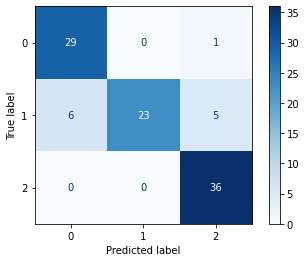

In [322]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

In [325]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, min_impurity_decrease=0.1, random_state=42), {
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes' : [1,2,3,4,5,6,7,8,9,10]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\andre\anaconda3\lib\site-packages

{'mean_fit_time': array([7.98511505e-04, 3.98921967e-04, 2.12907791e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.61261892e-01, 2.70452738e-01, 2.59346533e-01,
        2.68596315e-01, 2.62576962e-01, 2.65180492e-01, 2.61292028e-01,
        2.74704409e-01, 2.77392387e-01, 2.70762062e-01, 2.78918028e-01,
        2.82866764e-01, 2.83002472e-01, 3.36873960e-01, 3.04945421e-01,
        3.12854528e-01, 2.86433792e-01, 3.03528643e-01, 3.30249739e-01,
        3.27504969e-01, 3.02574778e-01, 2.95292044e-01, 2.86130333e-01,
        2.93597078e-01, 3.59098911e-01, 2.95295286e-01, 3.20771790e-01,
        2.84248257e-01, 2.87630367e-01, 3.32246161e-01, 3.14573097e-01,
        3.19484377e-01, 2.94601059e-01, 2.87458563e-01, 3.03422928e-01,
        3.42970037e-01, 3.36794853e-01, 3.44380379e-01, 2.88279295e-01,
        2.89008474e-01, 3.38743830e-01, 2.92770290e-01, 3.18657637e-01,
        3.03148890e-01, 2.94056559e-01, 3.26508

We can see here that min_samples_split and max_leaf_nodes doesn't matter at the end, as min_impurity decrease stops the tree, so this is the most important parameter to estimate first.

In [326]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, min_samples_split=5, min_samples_leaf=5, random_state=42), {
    'min_impurity_decrease': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.29872437, 0.29039583, 0.31235247, 0.29239664, 0.29437451,
        0.2875267 , 0.27360258, 0.34074326, 0.33474188, 0.29610691]),
 'std_fit_time': array([0.00777227, 0.00706335, 0.01037617, 0.01089185, 0.0165563 ,
        0.01059931, 0.00149585, 0.01142667, 0.01476762, 0.01100421]),
 'mean_score_time': array([0.02596564, 0.02001734, 0.02378016, 0.02134442, 0.02213473,
        0.02585611, 0.02427316, 0.03224669, 0.02861457, 0.02589364]),
 'std_score_time': array([0.00425834, 0.00208781, 0.00867045, 0.0048845 , 0.00309514,
        0.00468098, 0.00421353, 0.00406514, 0.0031894 , 0.00393353]),
 'param_min_impurity_decrease': masked_array(data=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                    0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_impurity_decrease': 0.01},
  {'min_impurity_decrease': 0.02},
  {'

In [346]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, min_samples_split=10, min_samples_leaf=10, random_state=42), {
    'min_impurity_decrease': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
}, cv=10)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.29551063, 0.33986633, 0.33136265, 0.35011306, 0.32110295,
        0.33717511, 0.31557348, 0.32972205, 0.30993488, 0.33900802]),
 'std_fit_time': array([0.00641143, 0.03628201, 0.02480009, 0.03373969, 0.02488027,
        0.02262533, 0.02877204, 0.02680481, 0.01905934, 0.04575801]),
 'mean_score_time': array([0.02245834, 0.02705433, 0.02444072, 0.02745514, 0.02461147,
        0.02411439, 0.02668459, 0.02667837, 0.02407403, 0.02514198]),
 'std_score_time': array([0.00365493, 0.00798879, 0.00448958, 0.00413354, 0.00441655,
        0.00413166, 0.00383078, 0.00569362, 0.00447842, 0.00487417]),
 'param_min_impurity_decrease': masked_array(data=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                    0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_impurity_decrease': 0.01},
  {'min_impurity_decrease': 0.02},
  {'

From here we can see that by looking at the best mean scores, that 0.05 obtains a high score, as well as one of the lowest std_test_score, meaning that we will pick 0.05 for min_impurity_decrease.

In [349]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=250, min_samples_split=10, max_leaf_nodes=10, min_impurity_decrease=0.05, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(max_leaf_nodes=10, min_impurity_decrease=0.05,
                       min_samples_split=10, n_estimators=250, random_state=42)

In [350]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.03919209 0.05852987 0.03710384 0.02740012
 0.03225067 0.00256908 0.06703074 0.13020583 0.05303663 0.09252846
 0.02411565 0.14660771 0.05580103 0.01769492 0.04200542 0.08597965
 0.0263962  0.02130885 0.01373854 0.00655526 0.01994947]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      1.00      0.97        34
           2       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



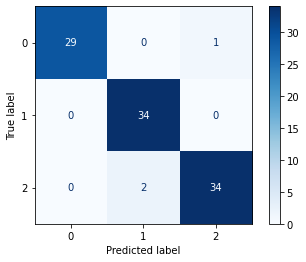

In [351]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

There are a few features with 0 importance and a few with very low importance, that is very good.

In [352]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, min_impurity_decrease=0.05, random_state=42), {
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.27267776, 0.28194857, 0.29761448, 0.27504573, 0.28289185,
        0.28791156, 0.31739407, 0.34330354, 0.36960258, 0.32597098,
        0.33277564, 0.3475493 , 0.30288773, 0.32933512, 0.29662061,
        0.32073603, 0.32549267, 0.86793299, 0.67635827, 0.41760259,
        0.36595597, 0.40971408, 0.37242684, 0.34381113, 0.3366993 ,
        0.34576602, 0.38913703, 0.3722568 , 0.3441484 , 0.33122377,
        0.33540516, 0.33815656, 0.33226576, 0.32285862, 0.34680486,
        0.3199101 , 0.33764586, 0.33583975, 0.3254262 , 0.33173523,
        0.34088492, 0.33410101, 0.30740705, 0.35182886, 0.32470965,
        0.3250433 , 0.34344859, 0.32579927, 0.33587646, 0.32363629,
        0.34478521, 0.33553014, 0.31175733, 0.35703864, 0.33325577,
        0.3189611 , 0.4246922 , 0.36403556, 0.3421874 , 0.36249681,
        0.36753654, 0.31849418, 0.33243203, 0.29868321, 0.32354794,
        0.34316726, 0.33464589, 0.30663433, 0.35661645, 0.32705727,
        0.31301179, 0.39412127,

We can see here that score stabilises at max_leaf_nodes = 6, Thus we don't have to tune min_samples_split.

In [365]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=250, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(max_leaf_nodes=6, min_impurity_decrease=0.05,
                       n_estimators=250, random_state=42)

In [366]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.03893874 0.0581578  0.03728204 0.02740012
 0.03274855 0.00256908 0.06721362 0.13071919 0.05356473 0.09215751
 0.02430277 0.14612709 0.05511312 0.01775867 0.04220357 0.08646543
 0.0263962  0.02130885 0.01349105 0.00655526 0.0195266 ]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      1.00      0.97        34
           2       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



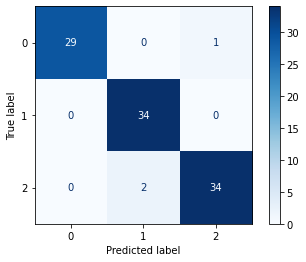

In [367]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

Lastly, we have to determine the max_features:

In [369]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, min_impurity_decrease=0.05, max_leaf_nodes=6, random_state=42), {
    'max_features': ['sqrt', 'log2']
}, cv=10)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.29973502, 0.31387486]),
 'std_fit_time': array([0.01366479, 0.02266582]),
 'mean_score_time': array([0.02170768, 0.02265193]),
 'std_score_time': array([0.00166511, 0.00404781]),
 'param_max_features': masked_array(data=['sqrt', 'log2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'sqrt'}, {'max_features': 'log2'}],
 'split0_test_score': array([0.98, 0.98]),
 'split1_test_score': array([0.92, 0.92]),
 'split2_test_score': array([0.96, 0.96]),
 'split3_test_score': array([0.97, 0.97]),
 'split4_test_score': array([0.98, 0.98]),
 'split5_test_score': array([0.95, 0.95]),
 'split6_test_score': array([0.96, 0.96]),
 'split7_test_score': array([0.98, 0.98]),
 'split8_test_score': array([0.95, 0.95]),
 'split9_test_score': array([0.94, 0.94]),
 'mean_test_score': array([0.959, 0.959]),
 'std_test_score': array([0.01868154, 0.01868154]),
 'rank_test_score': array([1, 1])}

In [376]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=500, min_impurity_decrease=0.05, max_leaf_nodes=6), {
    'random_state': [0,1,2,3,4,5]
}, cv=10)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.62356994, 0.67801106, 0.65593626, 0.6699573 , 0.67809849,
        1.12221174]),
 'std_fit_time': array([0.03915434, 0.0364509 , 0.04753446, 0.05654106, 0.03512085,
        0.45434589]),
 'mean_score_time': array([0.04580865, 0.05024447, 0.04598927, 0.0490169 , 0.04999156,
        0.08294876]),
 'std_score_time': array([0.00507016, 0.00420112, 0.00393564, 0.00602111, 0.0037246 ,
        0.0363905 ]),
 'param_random_state': masked_array(data=[0, 1, 2, 3, 4, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'random_state': 0},
  {'random_state': 1},
  {'random_state': 2},
  {'random_state': 3},
  {'random_state': 4},
  {'random_state': 5}],
 'split0_test_score': array([0.97, 0.97, 0.97, 0.97, 0.97, 0.97]),
 'split1_test_score': array([0.92, 0.92, 0.92, 0.92, 0.96, 0.92]),
 'split2_test_score': array([0.96, 0.96, 0.96, 0.96, 0.96, 0.96]),
 'split3_test_score': array([0.97, 0.98, 0.9

In [377]:
clf = GridSearchCV(RandomForestClassifier(min_impurity_decrease=0.05, max_leaf_nodes=6, random_state=42), {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.12158279, 0.26067748, 0.42699022, 0.57196355, 0.68741674,
        0.82343063, 0.97081122, 1.12344613, 1.23735805]),
 'std_fit_time': array([0.00863176, 0.01584477, 0.01607756, 0.02882336, 0.03960436,
        0.05238161, 0.02215342, 0.03281574, 0.02819829]),
 'mean_score_time': array([0.00810051, 0.0201849 , 0.03343859, 0.04693599, 0.05222449,
        0.06553664, 0.07427659, 0.10009356, 0.1126749 ]),
 'std_score_time': array([0.00405041, 0.00130969, 0.00372271, 0.0042292 , 0.00533156,
        0.00636322, 0.00628747, 0.01205465, 0.01905165]),
 'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400},
  {'n_estimators': 500},
  {'n_estimators': 600},
  {'n_estimators': 700

They give the exact same reults, so we will use sqrt. Thus the best model we have for Gini is:
RandomForestClassifier(n_estimators=500, min_impurity_decrease=0.05, max_leaf_nodes=6)

## entropy

In [370]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

In [385]:
cross_val_score(RandomForestClassifier(n_estimators=500, criterion='entropy', min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42), X, y, cv=10)

array([0.98, 0.96, 0.97, 0.98, 0.99, 0.98, 0.97, 0.98, 0.99, 0.98])

In [386]:
cross_val_score(RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42), X, y, cv=10)

array([0.98, 0.98, 0.97, 0.98, 0.99, 0.98, 0.97, 0.98, 0.99, 0.98])

In [387]:
cross_val_score(RandomForestClassifier(n_estimators=250, criterion='entropy', min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42), X, y, cv=10)

array([0.98, 0.96, 0.97, 0.98, 0.99, 0.98, 0.97, 0.98, 0.99, 0.98])

In [388]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=250, criterion='entropy', min_samples_split=2, max_leaf_nodes=5, min_impurity_decrease=0.1, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_impurity_decrease=0.1, n_estimators=250,
                       random_state=42)

In [389]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.04094232 0.06712386 0.04235848 0.03300944
 0.0420287  0.0052944  0.07136723 0.13080649 0.03598639 0.10311443
 0.02286747 0.1517674  0.05138912 0.00868023 0.03911612 0.06690156
 0.02612527 0.01173684 0.01647791 0.01037617 0.02253021]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      1.00      0.97        34
           2       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



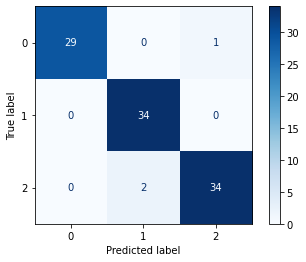

In [390]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

In [393]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, criterion='entropy',min_samples_split=5, min_samples_leaf=5, random_state=42), {
    'min_impurity_decrease': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.30806789, 0.28811803, 0.28734074, 0.29496989, 0.28365927,
        0.28940883, 0.29571834, 0.28386679, 0.28433733, 0.29309912,
        0.29477835]),
 'std_fit_time': array([0.02895311, 0.00507487, 0.01000798, 0.00940629, 0.00069276,
        0.00940047, 0.01505957, 0.00981351, 0.01074573, 0.00707339,
        0.01107733]),
 'mean_score_time': array([0.02226171, 0.02509217, 0.02589178, 0.02218809, 0.0202601 ,
        0.02417321, 0.02300696, 0.02227674, 0.02305183, 0.03026762,
        0.02174106]),
 'std_score_time': array([3.12778313e-03, 3.94374021e-03, 3.87493481e-03, 4.01398870e-03,
        5.87292281e-05, 4.24401427e-03, 2.99650555e-03, 3.08378486e-03,
        3.71420648e-03, 5.09164297e-05, 3.44407778e-03]),
 'param_min_impurity_decrease': masked_array(data=[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
                    0.19, 0.2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],


The best to use is 0.14

In [397]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=250, criterion="entropy", min_samples_split=5, max_leaf_nodes=5, min_impurity_decrease=0.14, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_impurity_decrease=0.14, min_samples_split=5,
                       n_estimators=250, random_state=42)

In [398]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.03988355 0.07201058 0.04175126 0.03344749
 0.04736999 0.00188078 0.08243601 0.1387333  0.03634317 0.10812655
 0.01943966 0.16944493 0.04822409 0.00474675 0.03588432 0.06304289
 0.02000552 0.01004452 0.01013958 0.00631546 0.01072962]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      0.85      0.92        34
           2       0.86      1.00      0.92        36

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



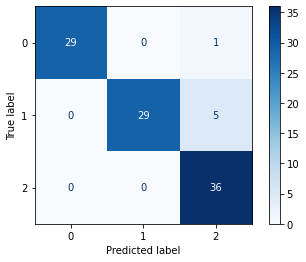

In [399]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

In [400]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, criterion='entropy', min_impurity_decrease=0.14, random_state=42), {
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.27248211, 0.32321014, 0.31960282, 0.30397606, 0.37790589,
        0.30063729, 0.34862823, 0.40459557, 0.37665801, 0.31057658,
        0.32284522, 0.3199945 , 0.31533532, 0.34460659, 0.34880114,
        0.34390683, 0.29161716, 0.35093327, 0.32354441, 0.30827236,
        0.32728362, 0.30216312, 0.3074688 , 0.44961381, 0.46839337,
        0.36071186, 0.32159429, 0.34196644, 0.33788395, 0.39053707,
        0.32956438, 0.28582969, 0.33041897, 0.3010098 , 0.33852825,
        0.30717392, 0.31546416, 0.30003076, 0.3286057 , 0.32334132,
        0.339854  , 0.34397573, 0.35994325, 0.34022999, 0.30873961,
        0.31062655, 0.32756386, 0.30242786, 0.4154736 , 0.80763898,
        0.47088804, 0.36067858, 0.33815789, 0.35785313, 0.35021181,
        0.3225121 , 0.33387723, 0.33147364, 0.3231236 , 0.31730237,
        0.31908188, 0.29107814, 0.31576457, 0.28648338, 0.30903001,
        0.30279555, 0.29403558, 0.31544485, 0.29136086, 0.32509127,
        0.29964113, 0.31000156,

In [404]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=250, criterion="entropy", min_samples_split=5, max_leaf_nodes=5, min_impurity_decrease=0.14, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_impurity_decrease=0.14, min_samples_split=5,
                       n_estimators=250, random_state=42)

In [405]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.03988355 0.07201058 0.04175126 0.03344749
 0.04736999 0.00188078 0.08243601 0.1387333  0.03634317 0.10812655
 0.01943966 0.16944493 0.04822409 0.00474675 0.03588432 0.06304289
 0.02000552 0.01004452 0.01013958 0.00631546 0.01072962]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      0.85      0.92        34
           2       0.86      1.00      0.92        36

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



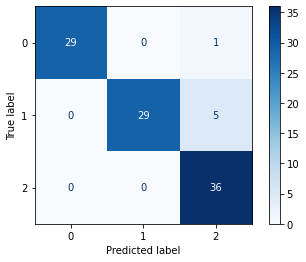

In [406]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

In [407]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=250, criterion='entropy', min_impurity_decrease=0.14, max_leaf_nodes=5, random_state=42), {
    'max_features': ['sqrt', 'log2']
}, cv=10)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.28985395, 0.30822611]),
 'std_fit_time': array([0.01708188, 0.01802552]),
 'mean_score_time': array([0.02139912, 0.02123368]),
 'std_score_time': array([0.00325966, 0.00417308]),
 'param_max_features': masked_array(data=['sqrt', 'log2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'sqrt'}, {'max_features': 'log2'}],
 'split0_test_score': array([0.95, 0.95]),
 'split1_test_score': array([0.94, 0.94]),
 'split2_test_score': array([0.94, 0.94]),
 'split3_test_score': array([0.95, 0.95]),
 'split4_test_score': array([0.97, 0.97]),
 'split5_test_score': array([0.95, 0.95]),
 'split6_test_score': array([0.94, 0.94]),
 'split7_test_score': array([0.95, 0.95]),
 'split8_test_score': array([0.96, 0.96]),
 'split9_test_score': array([0.95, 0.95]),
 'mean_test_score': array([0.95, 0.95]),
 'std_test_score': array([0.00894427, 0.00894427]),
 'rank_test_score': array([1, 1])}

In [410]:
clf = GridSearchCV(RandomForestClassifier(n_estimators=500, criterion='entropy', min_impurity_decrease=0.14, max_leaf_nodes=5), {
    'random_state': [0,1,2,3,4,5]
}, cv=10)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.58913107, 0.60443938, 0.67059131, 0.76260896, 0.68895187,
        0.73048778]),
 'std_fit_time': array([0.01696823, 0.03448931, 0.04475257, 0.07243351, 0.03189555,
        0.05990433]),
 'mean_score_time': array([0.04215338, 0.04510431, 0.05036287, 0.0545326 , 0.05082467,
        0.05687044]),
 'std_score_time': array([0.00300339, 0.00422439, 0.00612726, 0.00691767, 0.00119039,
        0.00745465]),
 'param_random_state': masked_array(data=[0, 1, 2, 3, 4, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'random_state': 0},
  {'random_state': 1},
  {'random_state': 2},
  {'random_state': 3},
  {'random_state': 4},
  {'random_state': 5}],
 'split0_test_score': array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95]),
 'split1_test_score': array([0.92, 0.92, 0.92, 0.94, 0.92, 0.92]),
 'split2_test_score': array([0.94, 0.94, 0.94, 0.94, 0.94, 0.94]),
 'split3_test_score': array([0.95, 0.95, 0.9

In [411]:
clf = GridSearchCV(RandomForestClassifier(criterion='entropy', min_impurity_decrease=0.14, max_leaf_nodes=5, random_state=42), {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900]
}, cv=5)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.11567717, 0.25706263, 0.37265735, 0.51685162, 0.66369033,
        0.74233813, 0.90714898, 1.03733454, 1.15380774]),
 'std_fit_time': array([0.01337554, 0.01507215, 0.0089437 , 0.03476596, 0.0336837 ,
        0.04494881, 0.0716802 , 0.02044158, 0.05326607]),
 'mean_score_time': array([0.01338043, 0.02047033, 0.0310751 , 0.04422092, 0.04931793,
        0.05556083, 0.07259946, 0.08612456, 0.09075422]),
 'std_score_time': array([0.00402957, 0.00036333, 0.00066466, 0.00380366, 0.00564248,
        0.00354789, 0.01004262, 0.00523149, 0.00892798]),
 'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400},
  {'n_estimators': 500},
  {'n_estimators': 600},
  {'n_estimators': 700

RandomForestClassifier(n_estimators=600, criterion='entropy', min_impurity_decrease=0.1, max_leaf_nodes=6)

In [421]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
forrest = RandomForestClassifier(n_estimators=600, criterion="entropy", max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=42)
forrest.fit(X_new_train, y_new_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=6,
                       min_impurity_decrease=0.1, n_estimators=600,
                       random_state=42)

In [422]:
print(forrest.feature_importances_)
print(forrest.feature_names_in_)

[0.         0.         0.04024316 0.06995892 0.04420973 0.03586585
 0.04598799 0.00992953 0.06879824 0.12110785 0.02626438 0.10996171
 0.01963704 0.15201837 0.05373353 0.01275875 0.03475026 0.0648134
 0.021442   0.01650897 0.01888324 0.00911342 0.02401365]
['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      1.00      0.97        34
           2       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



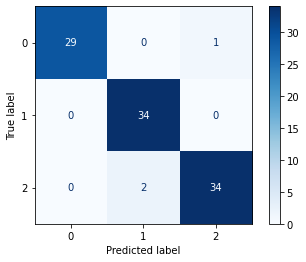

In [423]:
y_pred = forrest.predict(X_new_test)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
print(classification_report(y_new_test, y_pred))

## Comparing our models

In [429]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_gini = cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=1), X, y, cv=10)
cvs_ent = cross_val_score(RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1), X, y, cv=10)

In [430]:
print(cvs_gini)
print(cvs_ent)

[0.97 0.92 0.96 0.98 0.99 0.97 0.93 0.99 0.98 0.97]
[0.98 0.96 0.97 0.98 0.99 0.98 0.97 0.99 0.99 0.98]


In [431]:
print(cvs_gini.mean())
print(cvs_ent.mean())

0.966
0.9789999999999999


In [432]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_gini = cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=42), X, y, cv=5)
cvs_ent = cross_val_score(RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=42), X, y, cv=5)

In [433]:
print(cvs_gini)
print(cvs_ent)

[0.965 0.965 0.975 0.975 0.97 ]
[0.98  0.975 0.985 0.98  0.98 ]


In [434]:
print(cvs_gini.mean())
print(cvs_ent.mean())

0.97
0.9800000000000001


In [435]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_gini = cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=42), X, y, cv=2)
cvs_ent = cross_val_score(RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=42), X, y, cv=2)

In [436]:
print(cvs_gini)
print(cvs_ent)

[0.968 0.98 ]
[0.968 0.98 ]


In [437]:
print(cvs_gini.mean())
print(cvs_ent.mean())

0.974
0.974


In [438]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_gini = cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=0), X, y, cv=20)
cvs_ent = cross_val_score(RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=0), X, y, cv=20)

In [439]:
print(cvs_gini)
print(cvs_ent)

[0.94 0.96 0.96 0.88 0.94 0.92 0.98 0.9  0.98 0.98 0.98 0.96 0.92 0.94
 0.98 0.98 0.96 0.98 0.96 1.  ]
[0.96 1.   0.96 0.96 0.94 0.98 0.98 0.96 0.98 0.98 0.98 0.98 0.98 0.96
 0.98 0.98 0.98 0.98 0.98 1.  ]


In [440]:
print(cvs_gini.mean())
print(cvs_ent.mean())

0.9550000000000001
0.975


In [441]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_gini = cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=1), X, y, cv=50)
cvs_ent = cross_val_score(RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1), X, y, cv=50)

In [442]:
print(cvs_gini)
print(cvs_ent)

[0.95 0.95 0.95 1.   1.   0.95 0.95 1.   0.9  1.   0.95 0.95 0.95 0.95
 1.   1.   0.95 1.   0.95 0.95 0.95 1.   1.   1.   0.95 0.95 0.95 1.
 1.   1.   0.9  1.   0.95 0.95 1.   0.9  1.   1.   0.95 1.   0.9  1.
 1.   1.   0.95 0.95 0.95 1.   1.   1.  ]
[0.95 0.95 1.   1.   1.   0.95 0.95 1.   0.9  1.   0.95 0.95 0.95 0.95
 1.   1.   0.95 1.   0.95 1.   0.95 1.   1.   1.   1.   0.95 0.95 1.
 1.   1.   0.9  1.   0.95 0.95 1.   0.9  1.   1.   0.95 1.   0.9  1.
 1.   1.   0.95 0.95 0.95 1.   1.   1.  ]


In [443]:
print(cvs_gini.mean())
print(cvs_ent.mean())

0.97
0.9730000000000001


In [445]:
TR = []
BL = []
scores = []
for i in range(0, 20):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    forest = RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=1)
    forest.fit(X_new_train, y_new_train)

    y_pred = forest.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(forest.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [446]:
print(TR)
print(BL)
print(scores)

[1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.97, 0.96, 0.98, 0.98, 0.99, 0.96, 0.97, 0.95, 0.97, 0.97, 0.98, 0.97, 0.94, 1.0, 0.97, 0.91, 0.95, 0.99, 0.95, 0.98]


In [447]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

1.0
0.0
0.9669999999999999


In [448]:
TR = []
BL = []
scores = []
for i in range(0, 20):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    forest = RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1)
    forest.fit(X_new_train, y_new_train)

    y_pred = forest.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(forest.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [449]:
print(TR)
print(BL)
print(scores)

[1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.98, 0.97, 0.97, 0.99, 0.99, 0.96, 0.97, 1.0, 0.98, 0.99, 0.99, 0.99, 0.99, 1.0, 0.98, 0.96, 0.99, 0.99, 0.95, 0.99]


In [450]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.55
0.0
0.9814999999999998


Very good scores, but bad predictions for top right.

In [451]:
TR = []
BL = []
scores = []
for i in range(0, 50):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    forest = RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=1)
    forest.fit(X_new_train, y_new_train)

    y_pred = forest.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(forest.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [452]:
print(TR)
print(BL)
print(scores)

[1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.97, 0.96, 0.98, 0.98, 0.99, 0.96, 0.97, 0.95, 0.97, 0.97, 0.98, 0.97, 0.94, 1.0, 0.97, 0.91, 0.95, 0.99, 0.95, 0.98, 0.95, 0.96, 0.97, 0.93, 0.97, 0.97, 0.98, 0.93, 0.91, 0.96, 0.98, 0.99, 0.95, 0.87, 0.98, 0.96, 0.97, 0.95, 0.97, 0.96, 0.99, 0.92, 0.98, 0.93, 0.92, 0.97, 0.97, 0.98, 0.98, 0.95]


In [453]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

1.0
0.0
0.9608


In [454]:
TR = []
BL = []
scores = []
for i in range(0, 50):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    forest = RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1)
    forest.fit(X_new_train, y_new_train)

    y_pred = forest.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(forest.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [455]:
print(TR)
print(BL)
print(scores)

[1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.98, 0.97, 0.97, 0.99, 0.99, 0.96, 0.97, 1.0, 0.98, 0.99, 0.99, 0.99, 0.99, 1.0, 0.98, 0.96, 0.99, 0.99, 0.95, 0.99, 0.99, 0.96, 0.99, 0.98, 0.98, 0.97, 0.98, 0.93, 0.97, 0.97, 0.98, 0.99, 0.95, 0.91, 0.98, 0.96, 0.97, 0.95, 0.96, 0.96, 1.0, 0.96, 0.99, 0.96, 0.98, 0.99, 0.97, 0.96, 0.99, 0.96]


In [456]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.64
0.0
0.9743999999999999


### The last step we will use is to use the current approach's test set.

In [457]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [458]:
forest = RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=6, min_impurity_decrease=0.05,
                       n_estimators=500, random_state=1)

0.9766666666666667


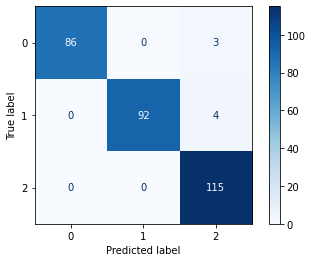

In [459]:
y_pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

A much higer score than the current approach of 0.903333333
We obtain a score of 0.976666667

In [460]:
forest = RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=6,
                       min_impurity_decrease=0.1, n_estimators=600,
                       random_state=1)

0.9766666666666667


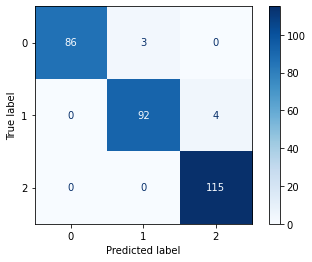

In [461]:
y_pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

A much higher score of 0.9766666, but it is the same as the gini random forest, but we can see that the top right has 0 entries.

In [467]:
forest = RandomForestClassifier(n_estimators=500, min_samples_split=2, max_leaf_nodes=6, min_impurity_decrease=0.05)
forest.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=6, min_impurity_decrease=0.05,
                       n_estimators=500)

0.9766666666666667


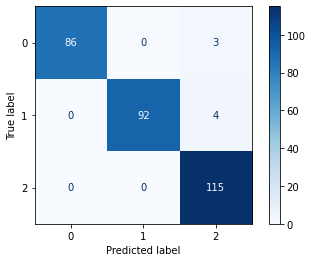

In [468]:
y_pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

In [469]:
forest = RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=6,
                       min_impurity_decrease=0.1, n_estimators=600,
                       random_state=1)

0.9766666666666667


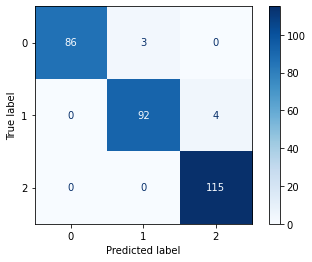

In [470]:
y_pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

# The better random forest model and the one we will use is:
RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1)